In [1]:
import os
import geopandas as gpd

data_path = "./../data"

In [2]:
boundaries_gdf = gpd.read_parquet(os.path.join(data_path, "boundaries.parquet"))
crs = boundaries_gdf.estimate_utm_crs()
boundaries_gdf = boundaries_gdf.to_crs(crs)
crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Processing geometries

In [3]:
roads_gdf = gpd.read_parquet(os.path.join(data_path, "osm/roads.parquet")).to_crs(crs)
railways_gdf = gpd.read_parquet(os.path.join(data_path, "osm/railways.parquet")).to_crs(crs)
water_gdf = gpd.read_parquet(os.path.join(data_path, "osm/water.parquet")).to_crs(crs)

In [4]:
from blocksnet.blocks.cutter import preprocess_urban_objects

lines_gdf, polygons_gdf = preprocess_urban_objects(roads_gdf, railways_gdf, water_gdf)

2025-02-21 14:43:14.964 | INFO     | blocksnet.blocks.cutter.preprocessing.core:preprocess_urban_objects:32 - Checking roads schema
2025-02-21 14:43:15.069 | INFO     | blocksnet.blocks.cutter.preprocessing.core:preprocess_urban_objects:38 - Checking railways schema
2025-02-21 14:43:15.085 | INFO     | blocksnet.blocks.cutter.preprocessing.core:preprocess_urban_objects:44 - Checking water schema


## Cut urban blocks

In [5]:
from blocksnet.blocks.cutter import cut_urban_blocks

blocks_gdf = cut_urban_blocks(boundaries_gdf, lines_gdf, polygons_gdf)

2025-02-21 14:43:15.258 | INFO     | blocksnet.blocks.cutter.processing.core:wrapper:14 - Checking boundaries schema
2025-02-21 14:43:15.268 | INFO     | blocksnet.blocks.cutter.processing.core:wrapper:18 - Checking line objects schema
2025-02-21 14:43:15.378 | INFO     | blocksnet.blocks.cutter.processing.core:wrapper:24 - Checking polygon objects schema
2025-02-21 14:43:15.395 | INFO     | blocksnet.blocks.cutter.processing.core:_exclude_polygons:38 - Excluding polygon objects from blocks
2025-02-21 14:43:16.373 | INFO     | blocksnet.blocks.cutter.processing.core:_get_enclosures:44 - Setting up enclosures
2025-02-21 14:43:19.026 | INFO     | blocksnet.blocks.cutter.processing.core:_fill_holes:61 - Filling holes inside the blocks
2025-02-21 14:43:19.902 | INFO     | blocksnet.blocks.cutter.processing.core:_filter_overlapping:71 - Filtering overlapping geometries
2025-02-21 14:43:22.069 | SUCCESS  | blocksnet.blocks.cutter.processing.core:cut_urban_blocks:111 - Blocks are successfully

<Axes: >

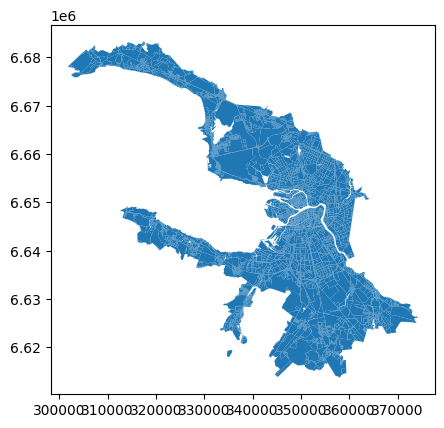

In [6]:
blocks_gdf.plot()